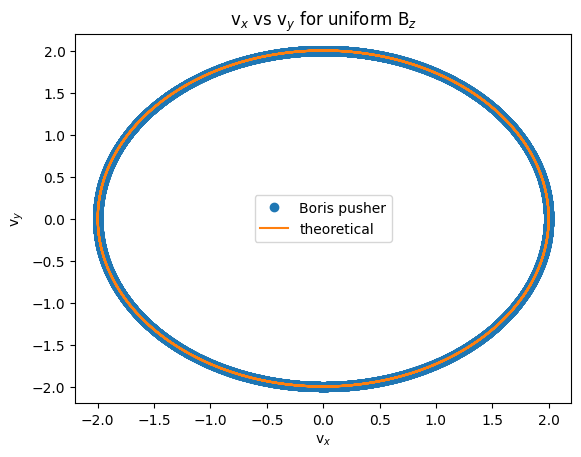

In [7]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#%matplotlib widget


uniform_bz = h5py.File("uniform_bz.h5")

x  = uniform_bz["x"][:]
vx = uniform_bz["vx"][:]
vy = uniform_bz["vy"][:]
vz = uniform_bz["vz"][:]

# Analytical solution

q = 1.0
m = 1.0
Bz = 3.0
Omega_c = q*Bz/m # cyclotron frequency
x_0 = 5.05
vx_0 = 0.0
vy_0 = 2.0
vz_0 = 0.0
t = np.arange(0, 4*np.pi, 0.001)
vx_ana = vy_0*np.sin(Omega_c*t)
vy_ana = vy_0*np.cos(Omega_c*t)
vz_ana = 0.0
r_L = vy_0/Omega_c # Larmor radius
x_ana = x_0 + r_L*(1 - np.cos(Omega_c*t))

plt.figure()
plt.plot(vx, vy, 'o', label='Boris pusher')
plt.plot(vx_ana, vy_ana, label='theoretical')
plt.xlabel(r'v$_x$')
plt.ylabel(r'v$_y$')
plt.title(r'v$_x$ vs v$_y$ for uniform B$_z$')
plt.legend()
plt.show()

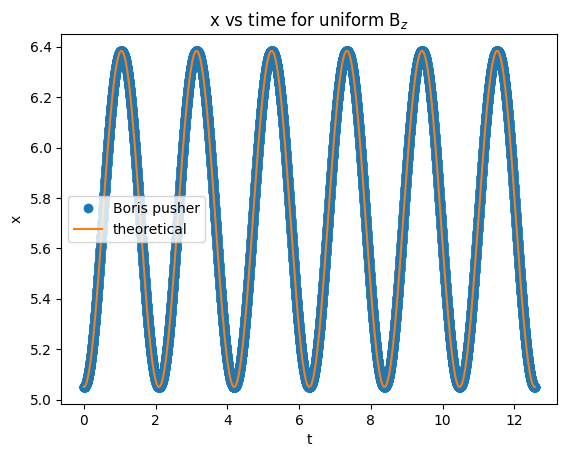

In [8]:
plt.figure()
plt.plot(t, x, 'o', label='Boris pusher')
plt.plot(t, x_ana, label='theoretical')
plt.xlabel(r't')
plt.ylabel(r'x')
plt.title(r'x vs time for uniform B$_z$')
plt.legend()
plt.show()

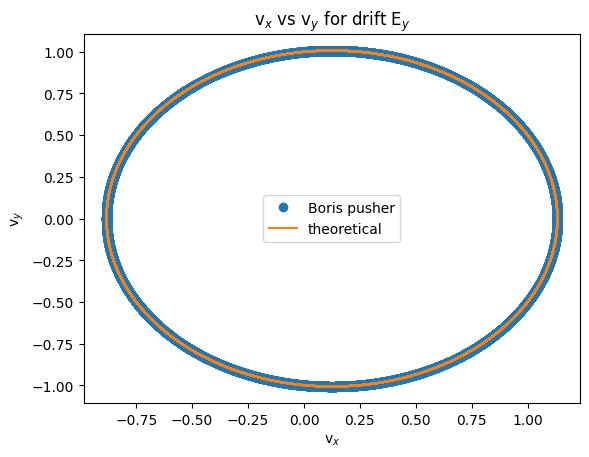

In [22]:
drift_ey = h5py.File("drift_ey.h5")

x  = drift_ey["x"][:]
vx = drift_ey["vx"][:]
vy = drift_ey["vy"][:]
vz = drift_ey["vz"][:]

# Analytical solution

Bz = 8.0
Ey = 1.0
vy_0 = 1.0
Omega_c = q*Bz/m
v_Ex = Ey*Bz/(Bz**2) # ExB drift
v_Ey = 0.0
c1 = np.sqrt((vx[0] - v_Ex)**2 + (vy[0] - v_Ey)**2)
c2 = np.arctan2(vx[0] - v_Ex, vy[0] - v_Ey) - Omega_c*t[0]
vx_ana = v_Ex + c1*np.sin(Omega_c*t + c2)
vy_ana = v_Ey + c1*np.cos(Omega_c*t + c2)
vz_ana = 0.0
x_ana = x_0 + v_Ex*t - (c1/Omega_c)*np.cos(Omega_c*t + c2) + (c1/Omega_c)*np.cos(c2)


plt.figure()
plt.plot(vx, vy, 'o', label='Boris pusher')
plt.plot(vx_ana, vy_ana, label='theoretical')
plt.xlabel(r'v$_x$')
plt.ylabel(r'v$_y$')
plt.title(r'v$_x$ vs v$_y$ for drift E$_y$')
plt.legend()
plt.show()

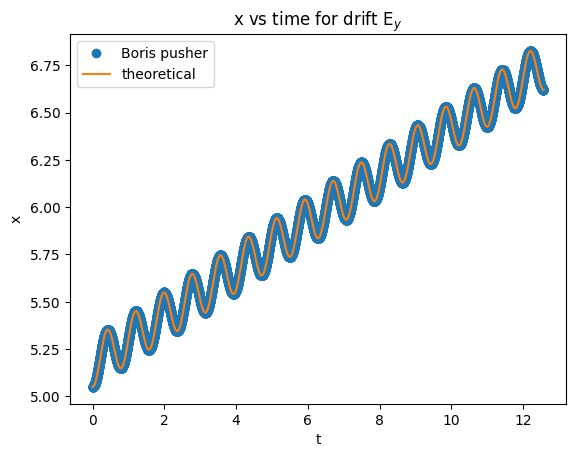

In [23]:
plt.figure()
plt.plot(t, x, 'o', label='Boris pusher')
plt.plot(t, x_ana, label='theoretical')
plt.xlabel(r't')
plt.ylabel(r'x')
plt.title(r'x vs time for drift E$_y$')
plt.legend()
plt.show()